In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#Reading CSV File

pd.set_option("display.max_columns", None)
df = pd.read_csv('val_stats.csv', low_memory = False)
df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,deaths,assists,kd_ratio,kills_round,most_kills,score_round,wins,win_percent,agent_1,agent_2,agent_3,gun1_name,gun1_head,gun1_body,gun1_legs,gun1_kills,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,161,"1,506","1,408",703,1.07,0.7,29,208.8,59,59.6,Fade,Viper,Omen,Vandal,35,59,5,802,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,316,"1,608","1,187",206,1.35,1.0,32,270.6,52,65.8,Chamber,Jett,Raze,Vandal,41,56,3,689,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,216,"1,115","1,064",267,1.05,0.8,39,227.8,42,65.6,Yoru,Jett,Chamber,Vandal,38,57,4,444,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,235,"1,134",812,157,1.40,1.0,37,277.0,32,62.8,Jett,Chamber,KAY/O,Vandal,51,47,2,754,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,137,869,781,213,1.11,0.8,29,230.9,32,62.8,Jett,Raze,Chamber,Vandal,36,60,4,419,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,56,603,508,296,1.19,0.7,24,210.1,32,76.2,Sova,Viper,Sage,Phantom,26,68,6,190,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,106,885,606,271,1.46,1.0,32,285.8,32,80.0,Viper,Sage,Omen,Phantom,36,60,4,400,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,185,919,733,136,1.25,0.9,33,247.9,26,52.0,Chamber,Reyna,Neon,Vandal,46,50,4,373,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,19,204,174,101,1.17,0.8,27,235.0,8,66.7,Brimstone,Viper,KAY/O,Vandal,28,67,5,89,Phantom,39,57,3,37,Spectre,27,69,4,17


In [ ]:
df.describe()

,damage_round,headshot_percent,aces,clutches,flawless,kd_ratio,kills_round,most_kills,score_round,wins,win_percent,gun1_head,gun1_body,gun1_legs,gun2_head,gun2_body,gun2_legs,gun3_head,gun3_body,gun3_legs,gun3_kills
count,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000,85678.000000
mean,142.815934,23.599013,1.058697,66.347254,39.112258,1.053942,0.758051,28.164371,218.225829,23.784904,53.878930,34.225285,61.354478,4.418334,30.464647,64.986228,4.510925,30.647097,64.857058,4.310313,59.421672
std,16.470485,5.187779,1.492623,53.117926,31.073547,0.157280,0.098120,5.215834,26.331791,18.365853,11.354115,8.106664,7.448574,2.074317,12.500141,12.259972,3.282963,15.905537,15.422508,4.078462,51.289982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132.800000,20.000000,0.000000,27.000000,16.000000,0.960000,0.700000,25.000000,202.025000,10.000000,48.100000,29.000000,57.000000,3.000000,24.000000,59.000000,2.000000,20.000000,57.000000,1.000000,23.000000
50%,142.000000,23.300000,1.000000,54.000000,32.000000,1.040000,0.800000,28.000000,216.700000,20.000000,52.900000,34.000000,62.000000,4.000000,30.000000,65.000000,4.000000,28.000000,67.000000,4.000000,46.000000
75%,151.800000,26.800000,2.000000,92.000000,55.000000,1.130000,0.800000,31.000000,232.600000,33.000000,58.800000,39.000000,66.000000,5.000000,37.000000,71.000000,6.000000,40.000000,73.000000,6.000000,81.000000
max,340.600000,83.300000,24.000000,488.000000,316.000000,6.500000,2.000000,58.000000,550.500000,170.000000,100.000000,100.000000,100.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,650.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85678 entries, 0 to 85677
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            64813 non-null  object 
 1   name              85675 non-null  object 
 2   tag               85358 non-null  object 
 3   rating            85678 non-null  object 
 4   damage_round      85678 non-null  float64
 5   headshots         85678 non-null  object 
 6   headshot_percent  85678 non-null  float64
 7   aces              85678 non-null  int64  
 8   clutches          85678 non-null  int64  
 9   flawless          85678 non-null  int64  
 10  first_bloods      85678 non-null  object 
 11  kills             85678 non-null  object 
 12  deaths            85678 non-null  object 
 13  assists           85678 non-null  object 
 14  kd_ratio          85678 non-null  float64
 15  kills_round       85678 non-null  float64
 16  most_kills        85678 non-null  int64 

In [ ]:
df.isnull().sum()

region              20865
name                    3
tag                   320
rating                  0
damage_round            0
headshots               0
headshot_percent        0
aces                    0
clutches                0
flawless                0
first_bloods            0
kills                   0
deaths                  0
assists                 0
kd_ratio                0
kills_round             0
most_kills              0
score_round             0
wins                    0
win_percent             0
agent_1                 0
agent_2              1987
agent_3              5217
gun1_name               0
gun1_head               0
gun1_body               0
gun1_legs               0
gun1_kills              0
gun2_name               0
gun2_head               0
gun2_body               0
gun2_legs               0
gun2_kills              0
gun3_name               0
gun3_head               0
gun3_body               0
gun3_legs               0
gun3_kills              0
dtype: int64

In [ ]:
#Filling missing values

df['region'].fillna(method = 'bfill', inplace = True)
df['name'].fillna(method = 'bfill', inplace = True)
df['tag'].fillna(method = 'bfill', inplace = True)
df['agent_2'].fillna(method = 'bfill', inplace = True)
df['agent_3'].fillna(method = 'bfill', inplace = True)

In [ ]:
#Checking if we have any null values left

df.isnull().sum()

region              0
name                0
tag                 0
rating              0
damage_round        0
headshots           0
headshot_percent    0
aces                0
clutches            0
flawless            0
first_bloods        0
kills               0
deaths              0
assists             0
kd_ratio            0
kills_round         0
most_kills          0
score_round         0
wins                0
win_percent         0
agent_1             0
agent_2             0
agent_3             0
gun1_name           0
gun1_head           0
gun1_body           0
gun1_legs           0
gun1_kills          0
gun2_name           0
gun2_head           0
gun2_body           0
gun2_legs           0
gun2_kills          0
gun3_name           0
gun3_head           0
gun3_body           0
gun3_legs           0
gun3_kills          0
dtype: int64

In [ ]:
df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,deaths,assists,kd_ratio,kills_round,most_kills,score_round,wins,win_percent,agent_1,agent_2,agent_3,gun1_name,gun1_head,gun1_body,gun1_legs,gun1_kills,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,EU,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,161,"1,506","1,408",703,1.07,0.7,29,208.8,59,59.6,Fade,Viper,Omen,Vandal,35,59,5,802,Phantom,33,62,5,220,Classic,36,60,3,147
1,EU,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,316,"1,608","1,187",206,1.35,1.0,32,270.6,52,65.8,Chamber,Jett,Raze,Vandal,41,56,3,689,Operator,8,91,0,226,Phantom,32,63,5,137
2,EU,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,216,"1,115","1,064",267,1.05,0.8,39,227.8,42,65.6,Yoru,Jett,Chamber,Vandal,38,57,4,444,Phantom,36,61,3,231,Operator,8,91,1,102
3,EU,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,235,"1,134",812,157,1.40,1.0,37,277.0,32,62.8,Jett,Chamber,KAY/O,Vandal,51,47,2,754,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,EU,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,137,869,781,213,1.11,0.8,29,230.9,32,62.8,Jett,Raze,Chamber,Vandal,36,60,4,419,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,56,603,508,296,1.19,0.7,24,210.1,32,76.2,Sova,Viper,Sage,Phantom,26,68,6,190,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,106,885,606,271,1.46,1.0,32,285.8,32,80.0,Viper,Sage,Omen,Phantom,36,60,4,400,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,185,919,733,136,1.25,0.9,33,247.9,26,52.0,Chamber,Reyna,Neon,Vandal,46,50,4,373,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,19,204,174,101,1.17,0.8,27,235.0,8,66.7,Brimstone,Viper,KAY/O,Vandal,28,67,5,89,Phantom,39,57,3,37,Spectre,27,69,4,17


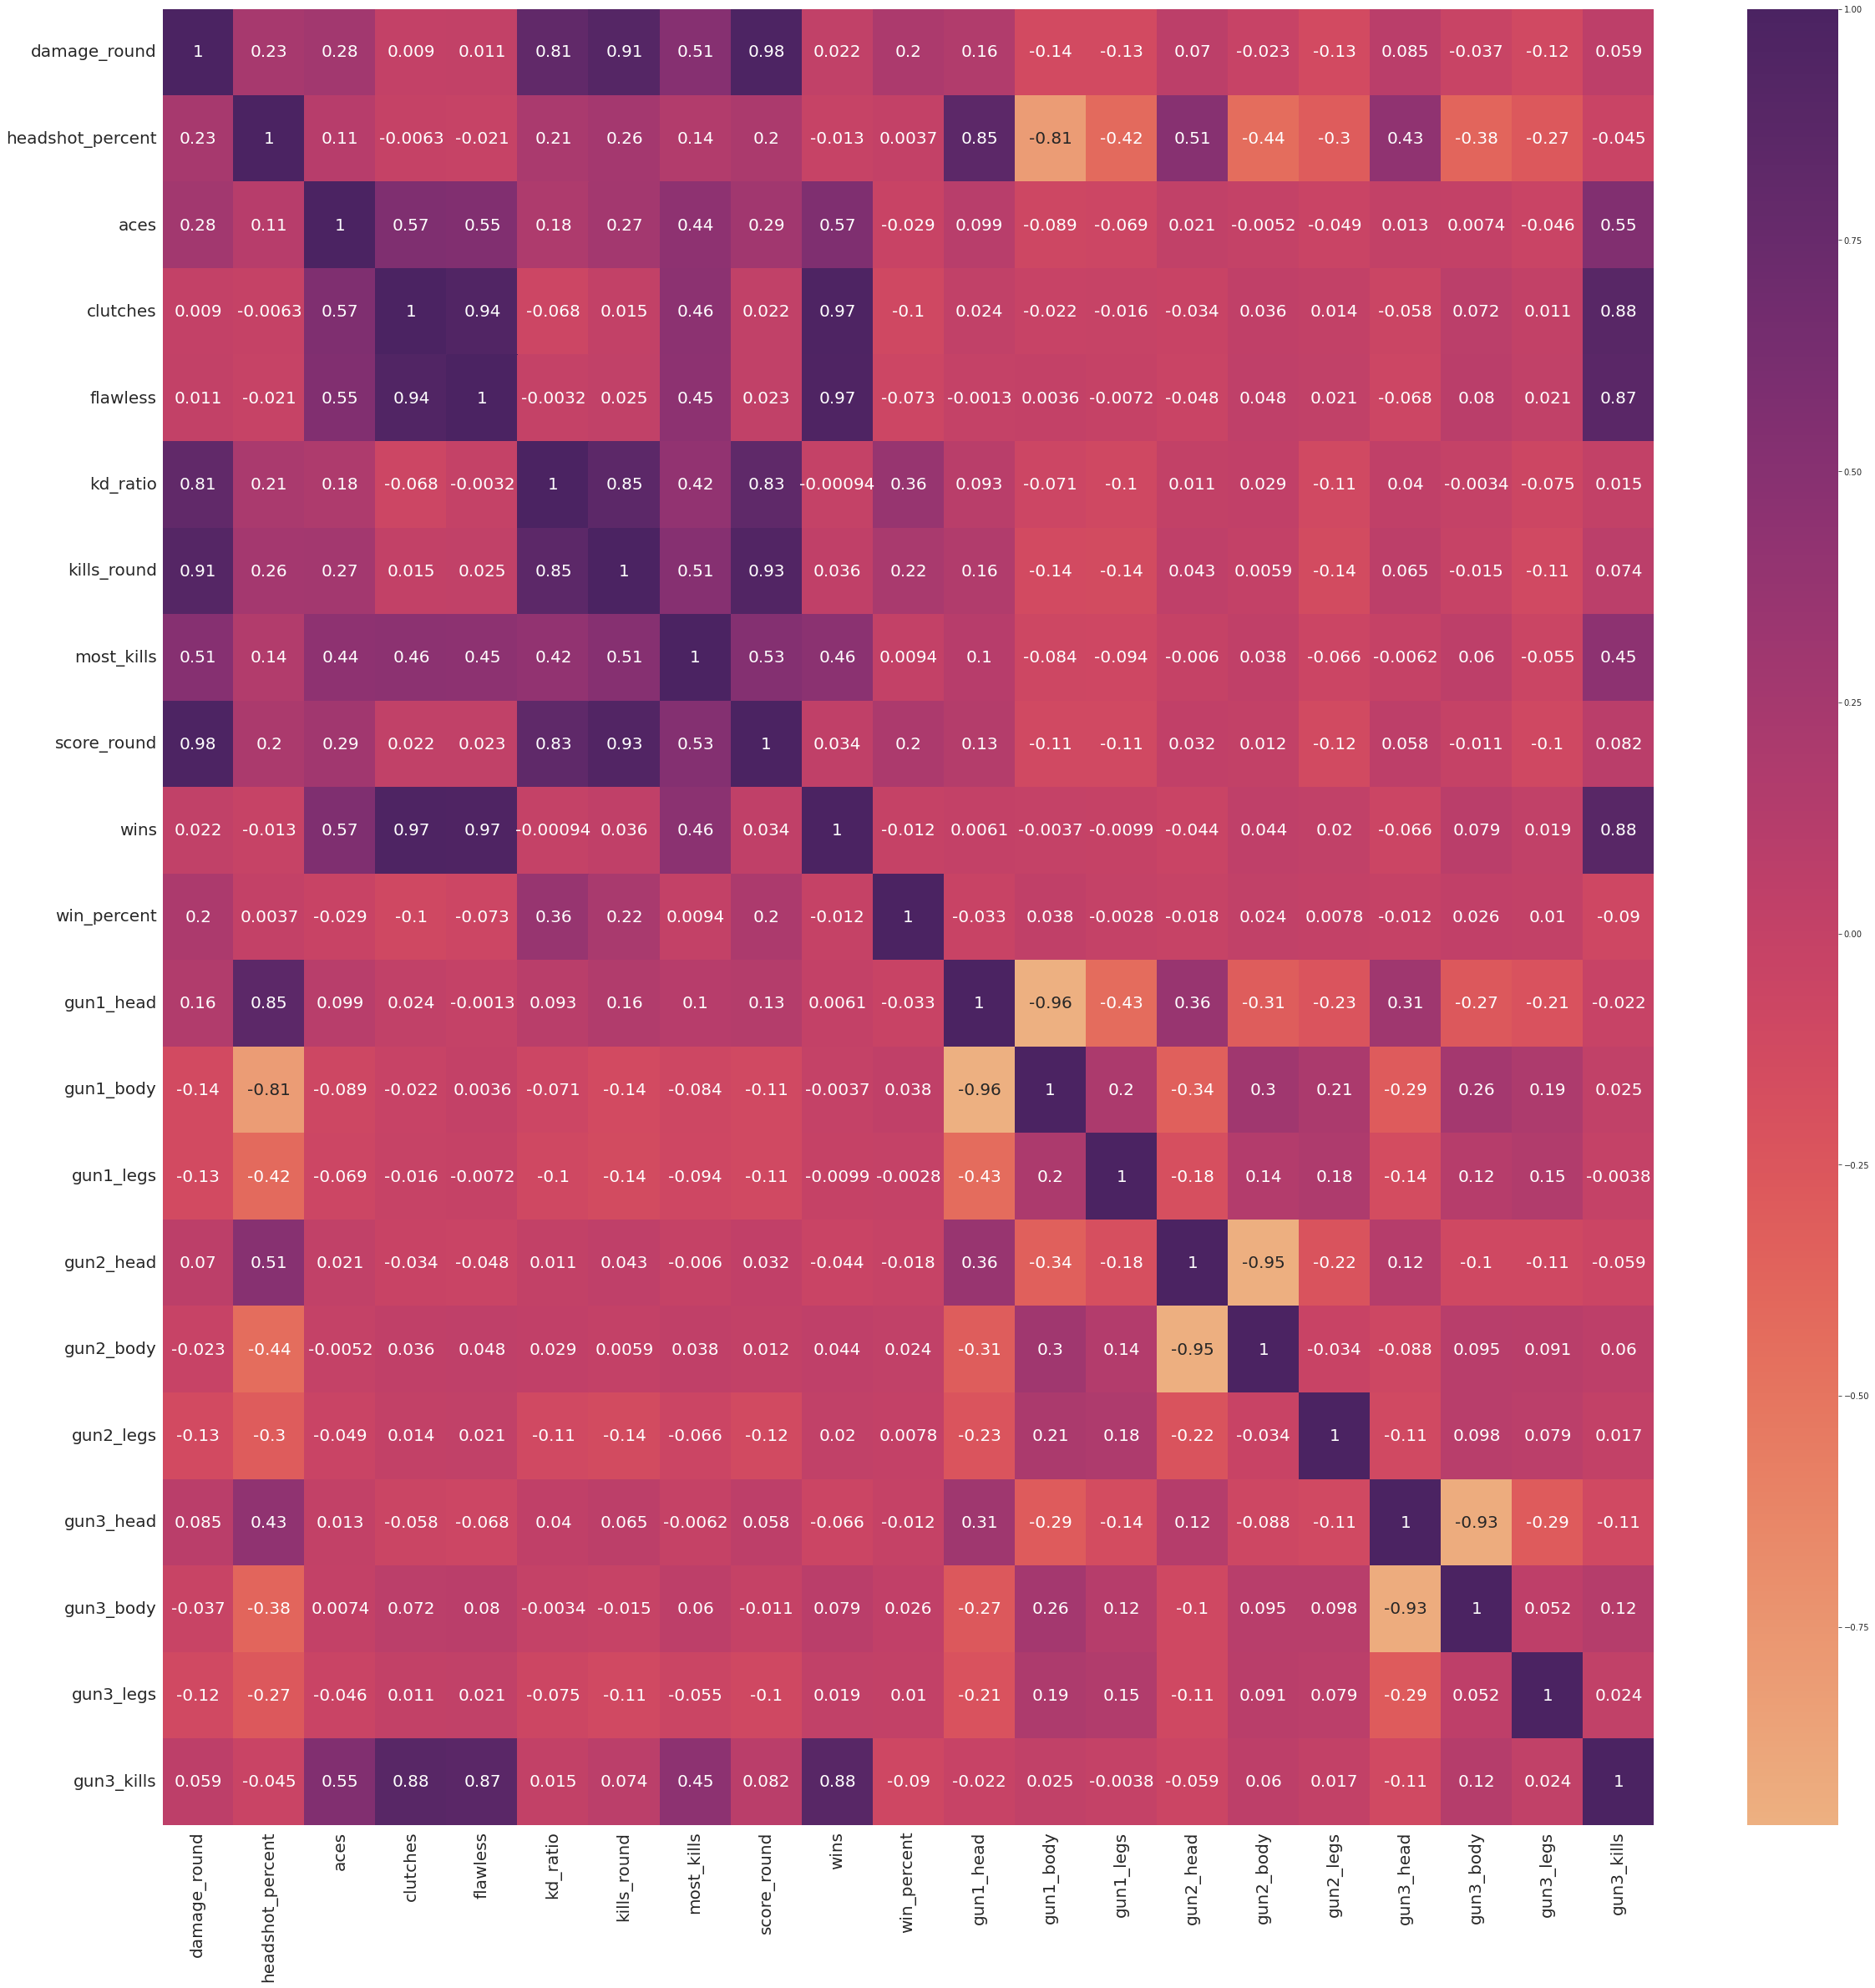

In [ ]:
#Heatmap to check correlation b/w our features

plt.figure(figsize=(40, 40))
sns.set_style('darkgrid')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(df.corr() ,annot=True, cmap=sns.color_palette("flare", as_cmap=True), annot_kws={"size": 20})
plt.show()

In [ ]:
#Encoding object data type to int 

encode = preprocessing.LabelEncoder()
df['rating'] = encode.fit_transform(df['rating'])
df['kills'] = encode.fit_transform(df['kills'])
df['gun1_kills'] = encode.fit_transform(df['gun1_kills'])
df['gun2_kills'] = encode.fit_transform(df['gun2_kills'])
df['agent_1'] = encode.fit_transform(df['agent_1'])
df['agent_2'] = encode.fit_transform(df['agent_2'])
df['agent_3'] = encode.fit_transform(df['agent_3'])

In [ ]:
#x and y splitting to run ML algorithms

x = df[['rating', 'kills', 'kills_round', 'kd_ratio', 'flawless', 'clutches', 'aces', 'damage_round', 'score_round', 'wins', 'gun3_kills', 'gun1_kills', 'gun2_kills', 'agent_1', 'agent_2', 'agent_3']]
y = df[['most_kills']]

In [ ]:
x

,rating,kills,kills_round,kd_ratio,flawless,clutches,aces,damage_round,score_round,wins,gun3_kills,gun1_kills,gun2_kills,agent_1,agent_2,agent_3
0,14,508,0.7,1.07,80,140,0,135.8,208.8,59,147,1583,151,5,17,10
1,14,610,1.0,1.35,94,122,2,170.3,270.6,52,137,1456,157,3,6,12
2,14,117,0.8,1.05,59,117,3,147.5,227.8,42,102,1185,163,18,6,3
3,14,136,1.0,1.40,49,83,3,178.2,277.0,32,36,1529,438,6,3,7
4,14,3028,0.8,1.11,38,71,2,149.8,230.9,32,64,1157,623,6,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,14,2734,0.7,1.19,54,58,0,138.2,210.1,32,71,843,100,16,17,14
85674,14,3046,1.0,1.46,42,77,4,182.9,285.8,32,139,1137,142,17,14,10
85675,14,3084,0.9,1.25,54,70,0,158.8,247.9,26,87,1106,82,3,13,9
85676,10,1978,0.8,1.17,18,23,0,155.9,235.0,8,17,1679,316,2,17,7


In [ ]:
x.dtypes

rating            int64
kills             int64
kills_round     float64
kd_ratio        float64
flawless          int64
clutches          int64
aces              int64
damage_round    float64
score_round     float64
wins              int64
gun3_kills        int64
gun1_kills        int64
gun2_kills        int64
agent_1           int64
agent_2           int64
agent_3           int64
dtype: object

In [ ]:
y

,most_kills
0,29
1,32
2,39
3,37
4,29
...,...
85673,24
85674,32
85675,33
85676,27


In [ ]:
#Splitting x and y into training & testing data set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

### **MACHINE** **LEARNING** **ALGORTIHMS**

In [ ]:
#Classification Algorithm # 1

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_acc = accuracy_score(y_test, rf_predict) * 100
print("Acc: ", rf_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Acc:  15.324463118580766


In [ ]:
#Regression Algorithm # 1

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
lr_acc = r2_score(y_test, lr_predict) * 100
print("Accuracy: ", lr_acc)

Accuracy:  49.72021922880686


In [ ]:
#Classification Algorithm # 2

knc = KNeighborsClassifier(n_neighbors = 49).fit(x_train, y_train)
knc_predict = knc.predict(x_test)
knc_acc = accuracy_score(y_test, knc_predict) * 100
print("Accuracy: ", knc_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  11.379551820728292


In [ ]:
#Regression Algorithm # 2

rf_reg = RandomForestRegressor(n_estimators = 1000, max_depth = 10, random_state = 42)
rf_reg.fit(x_train, y_train)
rf2_predict = rf_reg.predict(x_test)
rf2_acc = r2_score(y_test, rf2_predict) * 100
print("Accuracy: ", rf2_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy:  60.525127161863466


In [ ]:
#Regression Algorithm # 3

dt = DecisionTreeRegressor(max_depth = 10)
dt.fit(x_train, y_train)
dt_predict = dt.predict(x_test)
dt_acc = r2_score(y_test, dt_predict) * 100
print("Accuracy: ", dt_acc)

Accuracy:  56.677382519003004
